In [81]:
import pandas as pd
import numpy as np
import scipy
from matplotlib import pyplot as plt

In [82]:
citynamelist=["bj","sh","gz","sz"]
citynamelist_chinese=["北京","上海","广州","深圳"]
df_list_2022=[]
df_list_2023=[]

In [83]:
for i in range(len(citynamelist)):
    df_2022=pd.read_csv("RawData\\"+citynamelist[i]+".csv")
    df_2023=pd.read_csv(citynamelist[i]+"2.csv")
    df_2022 = df_2022.drop_duplicates()  # 去重
    df_2022 = df_2022.dropna()  # 去空值
    df_2023 = df_2023.drop_duplicates()  # 去重
    df_2023 = df_2023.dropna()  # 去空值
    df_list_2022.append(df_2022)
    df_list_2023.append(df_2023)
    # df_list_2023.append(pd.read_csv(citynamelist[i]+"2.csv"))
    # df_list_2022.append(pd.read_csv("RawData\\"+citynamelist[i]+".csv"))
    
print(df_list_2022[0].columns)
print(df_list_2023[0].columns)

Index(['name_chinese', 'block', 'house_type', 'direct', 'area', 'price'], dtype='object')
Index(['name_chinese', 'block', 'house_type', 'direct', 'area', 'price'], dtype='object')


In [84]:
direct_list=["东","南","西","北","东南","东北","西南","西北"]
for i in range(len(citynamelist)):
    
    df_list_2023[i]["direct"]=df_list_2023[i]["direct"].apply(lambda x: x.split("/")[0] if x.split("/")[0] in direct_list else None)
    df_list_2023[i].dropna()
    print(df_list_2023[i]["direct"].value_counts())
    

direct
南     24568
东      4287
西      1948
东南     1655
北      1599
西南     1231
西北      642
东北      524
Name: count, dtype: int64
direct
南     24534
北       645
东       548
东南      479
西       298
西南      270
西北       80
东北       55
Name: count, dtype: int64
direct
南     23133
东南     8293
北      6505
东      5005
西南     2196
东北     1846
西      1310
西北      986
Name: count, dtype: int64
direct
南     8184
东南    4912
西南    1527
北     1403
东     1372
西北     683
东北     674
西      470
Name: count, dtype: int64


In [85]:
def get_house_type(x):
    #12室，1室中提取室数
    try:
        y=int(x.replace("居","").replace("卫","").split("室")[0])
        if y<4 and y>0:
            return y
    except:
        return None
result_2022=[]
result_2023=[]
for i in range(len(citynamelist)):
    result_2022_tmp={}
    result_2023_tmp={}
    result_2022_tmp["direct"]=df_list_2022[i]["direct"].value_counts()/df_list_2022[i]["direct"].value_counts().sum()
    result_2023_tmp["direct"]=df_list_2023[i]["direct"].value_counts()/df_list_2023[i]["direct"].value_counts().sum()
    print(result_2022_tmp["direct"])
    print(result_2023_tmp["direct"])
    df_list_2022[i]["house_type"]=df_list_2022[i]["house_type"].apply(get_house_type)
    df_list_2023[i]["house_type"]=df_list_2023[i]["house_type"].apply(get_house_type)
    #转化成str
    df_list_2022[i]["house_type"]=df_list_2022[i]["house_type"].astype(str)
    df_list_2023[i]["house_type"]=df_list_2023[i]["house_type"].astype(str)
    df_list_2022[i].dropna()
    df_list_2023[i].dropna()
    result_2022_tmp["house_type"]=df_list_2022[i]["house_type"].value_counts()/df_list_2022[i]["house_type"].value_counts().sum()
    result_2023_tmp["house_type"]=df_list_2023[i]["house_type"].value_counts()/df_list_2023[i]["house_type"].value_counts().sum()
    print(result_2022_tmp["house_type"])
    print(result_2023_tmp["house_type"])
    result_2022_tmp["block"]=df_list_2022[i]["block"].value_counts()/df_list_2022[i]["block"].value_counts().sum()
    result_2023_tmp["block"]=df_list_2023[i]["block"].value_counts()/df_list_2023[i]["block"].value_counts().sum()
    result_2022.append(result_2022_tmp)
    result_2023.append(result_2023_tmp)
    print(result_2022_tmp["block"])
    print(result_2023_tmp["block"])


direct
南     0.620542
东     0.143066
西     0.059367
东南    0.050991
北     0.050608
西南    0.038790
西北    0.020056
东北    0.016580
Name: count, dtype: float64
direct
南     0.673945
东     0.117600
西     0.053437
东南    0.045400
北     0.043863
西南    0.033769
西北    0.017611
东北    0.014374
Name: count, dtype: float64
house_type
2.0    0.442231
1.0    0.230379
3.0    0.195899
nan    0.131491
Name: count, dtype: float64
house_type
2.0    0.496518
1.0    0.272164
3.0    0.184796
nan    0.046521
Name: count, dtype: float64
block
望京      0.026903
回龙观     0.019048
顺义城     0.013556
北苑      0.012444
后沙峪     0.011818
          ...   
琉璃河     0.000104
怀柔其它    0.000104
十八里店    0.000104
天宫院南    0.000035
延庆其它    0.000035
Name: count, Length: 248, dtype: float64
block
望京       0.023165
顺义城      0.019902
长阳       0.013789
朝青       0.012117
双井       0.011952
           ...   
古北口镇     0.000082
怀柔其它     0.000082
巨各庄镇     0.000082
平谷其它     0.000027
西田各庄镇    0.000027
Name: count, Length: 252, dtype: float64
direc

南
东
西
东南
北
西南
西北
东北
2.0
1.0
3.0
nan
南
东
东南
北
西南
西
西北
东北
2.0
1.0
3.0
nan
南
东南
北
东
西南
东北
西
西北
3.0
2.0
1.0
nan
南
东南
东
北
西南
西北
东北
西
3.0
2.0
1.0
0.24748610462896178
0.19499600995165


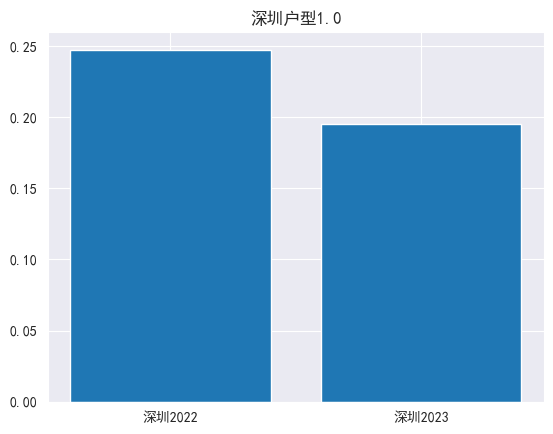

nan


In [86]:
plt.rcParams['font.sans-serif'] = ['SimHei']
for i in range(len(citynamelist)):
    for datatype in ["direct","house_type"]:
        #print(result_2022[i][datatype])
        for j in range(len(result_2022[i][datatype])):
            print(result_2022[i][datatype].index[j])
            if result_2022[i][datatype].index[j]=="nan":
                continue
            #对比一下数据，差距大就输出
            if (abs(result_2022[i][datatype][result_2022[i][datatype].index[j]]-result_2023[i][datatype][result_2022[i][datatype].index[j]])/result_2022[i][datatype][result_2022[i][datatype].index[j]])>0.2:
                print(result_2022[i][datatype][result_2022[i][datatype].index[j]])
                print(result_2023[i][datatype][result_2022[i][datatype].index[j]])
                # print(citynamelist_chinese[i] +str(datatype + result_2022[i][datatype].index[j]) +" 2022:" + str(result_2022[i][datatype][j]) +" 2023:" + str(result_2023[i][datatype][j]))
                # plt.bar([citynamelist_chinese[i]+"2022",citynamelist_chinese[i]+"2023"],result_2022[i][datatype][result_2022[i][datatype].index[j]],result_2023[i][datatype][result_2022[i][datatype].index[j]])
                plt.bar([citynamelist_chinese[i]+"2022",citynamelist_chinese[i]+"2023"],[result_2022[i][datatype][result_2022[i][datatype].index[j]],result_2023[i][datatype][result_2022[i][datatype].index[j]]])
                plt.title(citynamelist_chinese[i]+datatype+result_2022[i][datatype].index[j])
                if datatype=="house_type":
                    plt.title(citynamelist_chinese[i]+"户型"+result_2022[i][datatype].index[j])
                plt.show()

In [87]:
    """name_chinese,block,house_type,direct,area,price"""
#创建numpy.float64,值为1.3
d=np.float64(1.3)
print(str(d))

1.3


In [88]:
#比较一下2022和2023的单位面积价格
for i in range(len(citynamelist)):
    print(citynamelist_chinese[i])
    print(df_list_2022[i]["price"].mean())
    print(df_list_2023[i]["price"].mean())
    print(df_list_2022[i]["area"].mean())
    print(df_list_2023[i]["area"].mean())
    print(df_list_2022[i]["price"].mean()/df_list_2022[i]["area"].mean())
    print(df_list_2023[i]["price"].mean()/df_list_2023[i]["area"].mean())

北京
8753.166145290234
8213.792559899117
88.45004379562043
86.79591973244148
98.96169373885198
94.63339503998677
上海
8354.498178163085
7723.664333333333
83.12921053733719
80.42459481481481
100.50015059881619
96.03609879686427
广州
4258.598227340831
4314.66321092352
85.79525804646461
87.10242326694157
49.636755274218984
49.53551289497919
深圳
7623.928804785947
7566.694221471154
79.89534515677373
84.84397267990424
95.42394228131789
89.18363888992397


In [89]:
#计算2022和2023的单位面积价格的增长率
result={}
for i in range(len(citynamelist)):
    result[citynamelist_chinese[i]]=(df_list_2023[i]["price"].mean()/df_list_2023[i]["area"].mean()-(df_list_2022[i]["price"].mean()/df_list_2022[i]["area"].mean()))/(df_list_2022[i]["price"].mean()/df_list_2022[i]["area"].mean())
print(result)

{'北京': -0.04373711216268258, '上海': -0.044418359329349184, '广州': -0.002039665539789567, '深圳': -0.06539557308371287}


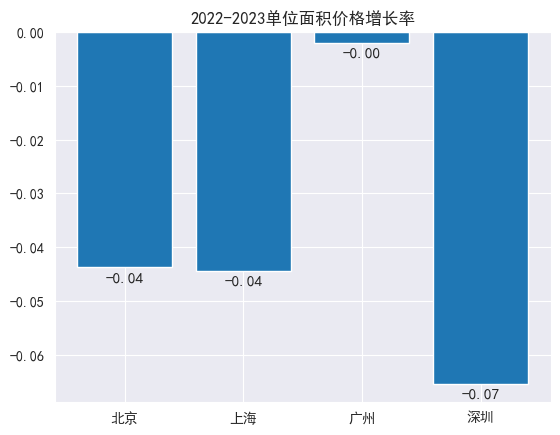

In [90]:
#绘制2022和2023的单位面积价格的增长率
# plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号
plt.bar(result.keys(),result.values())
plt.title("2022-2023单位面积价格增长率")
#加上数值
for a,b in zip(result.keys(),result.values()):
    plt.text(a, b-0.003, '%.2f' % b, ha='center', va= 'bottom',fontsize=11)
plt.show()  